In [170]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

y, sr = librosa.load('diapason1.wav')

In [171]:
# Reproducir el audio
Audio(data=y, rate=sr)

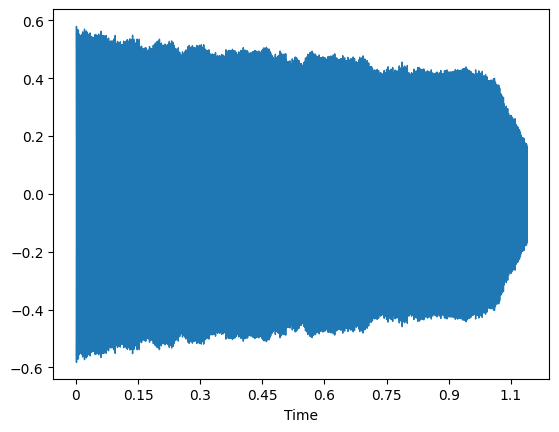

In [172]:
librosa.display.waveshow(
    y=y, 
    sr=sr
)

plt.show()

In [173]:
n_fft = 2048

S = np.abs(librosa.stft(y=y, n_fft=n_fft))

# Amplitud
D1 = librosa.amplitude_to_db(
    S, ref=np.max
)

# Intensidad
D2 = librosa.amplitude_to_db(
    S**2, ref=np.max
)

frequencies = np.arange(0, 1 + n_fft/2) * sr/n_fft

# Frecuencia dominante
pos_max = np.argmax(D2)

row_max = pos_max // D2.shape[1]
column_max = pos_max % D2.shape[1]

In [174]:
print(f'La frecuencia dominante es: {frequencies[np.argmax(D2[:, column_max])]}')

La frecuencia dominante es: 441.4306640625


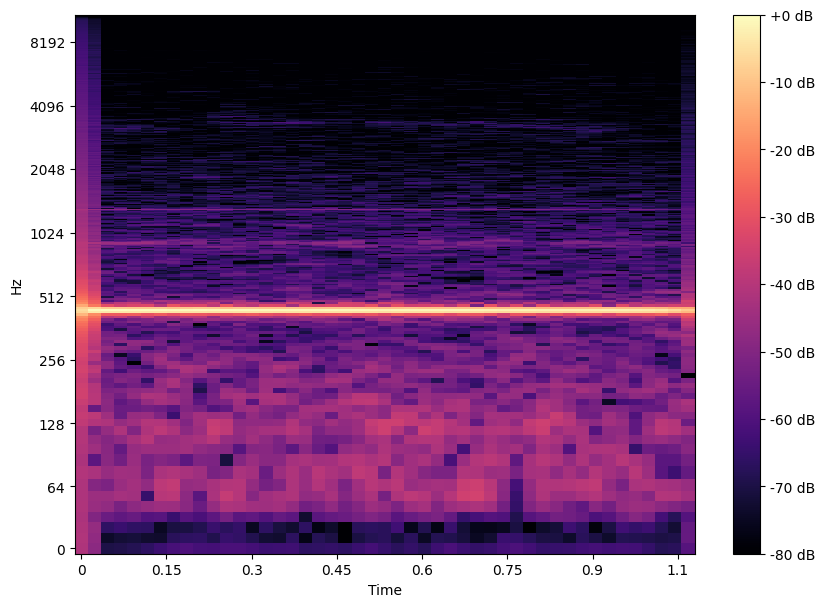

In [175]:
fig, ax = plt.subplots(figsize=(10, 7))

img = librosa.display.specshow(D1, y_axis='log', x_axis='time', sr=sr)

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

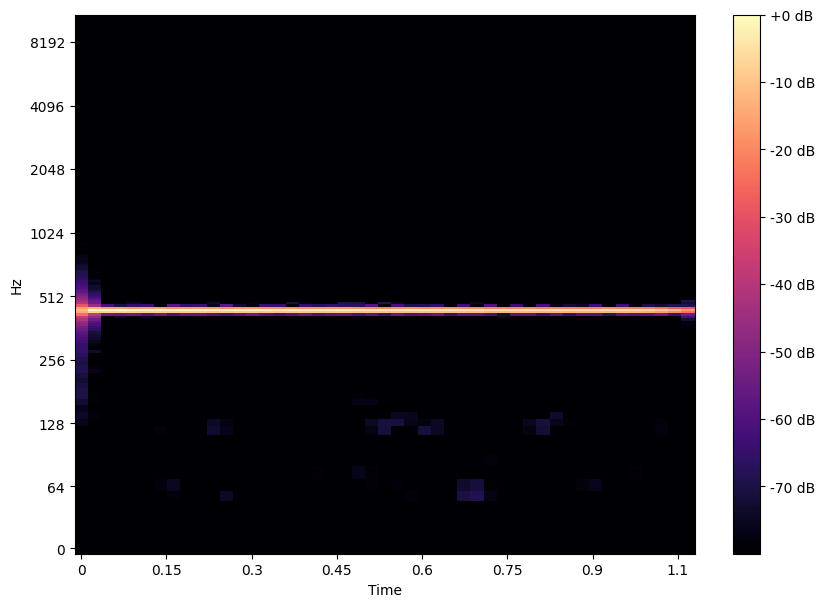

In [176]:
# Potencia
fig, ax = plt.subplots(figsize=(10, 7))

img = librosa.display.specshow(D2, y_axis='log', x_axis='time', sr=sr)

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()